# Dreamclinic Client Churn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy


In [ ]:
pep8 = "0987654321" * 8

In [ ]:
pep8

In [ ]:
client_df = pd.read_excel("~/dales_work/clinic_services_8-1-2016_to_8-3-2019.xlsx")


In [ ]:
client_df.drop('Name_Full', axis=1, inplace=True)

# remove rows where HrsWorked = 0 because they are just used by the front desk staff
client_df  = client_df[client_df['HrsWorked'] != 0]

# fill NaN values in 'Service_Category with 'Massage'
client_df['Service_Category'].fillna(value='Massage', inplace=True)

# remove white space from Therapist names
client_df['Therapist'] = client_df['Therapist'].str.strip()

# make all therapist names lowercase to avoid typos in data entry
client_df['Therapist'] = client_df['Therapist'].str.lower()

# make all therapist names lowercase to avoid typos in data entry
client_df['Therapist'] = client_df['Therapist'].str.lower()

# find and replace nicknames with domain knowledge
client_df = client_df.replace('abby thomson', 'abigail thomson')

#Drop Address_City and Addres_State Columns from Dataframe
client_df.drop(['Address_City', 'Address_State'], axis=1, inplace=True)

In [ ]:
# Drop rows without a clientID
client_df.dropna(subset=['clientID'], inplace=True)

In [ ]:
# Adds year and month columns to dataframe
client_df['Year'] = client_df['TransactionDate'].map(lambda x: x.year)

client_df['Month'] = client_df['TransactionDate'].map(lambda x: x.month)

In [ ]:
# creates a Dataframe that groups by year and month and counts unique clients
counts_by_month_df = client_df.groupby(['Year', 'Month']).nunique()

In [ ]:
# Cleans the counts_by_month_df to only include data that is applicaple to it's EDA
counts_by_month_df.rename(columns={"clientID" : "unique_client_count", 
                                   "Therapist" : "therapists_employed", 
                                   "Zipcode" :"zipcodes_reached"}, inplace=True)

In [ ]:
#Drop unnessesary columns
counts_by_month_df.drop(["TransactionDate", "Invoice_Category", "HrsWorked", "Year", "Month"], axis=1, inplace=True)

In [ ]:
counts_by_month_df.head()

In [ ]:
months = client_df.TransactionDate.dt.to_period("M")

In [ ]:
g = client_df.groupby(per)

In [ ]:
client_count_df = g.nunique()  #

In [ ]:
client_count_df.drop('TransactionDate', axis=1, inplace= True)

In [ ]:
client_count_df.reset_index(inplace=True)

In [ ]:
client_count_df["client_count"] = client_count_df['clientID']

In [ ]:
client_count_df.drop('clientID', axis=1, inplace=True)

In [ ]:
client_count_df['TransactionDate'] = client_count_df['TransactionDate'].astype('str')

In [ ]:
client_count_df.rename(columns={"clientID" : "unique_client_count", 
                                   "Therapist" : "therapists_employed", 
                                   "Zipcode" :"zipcodes_reached"}, inplace=True)


In [ ]:
client_count_df.drop(["Invoice_Category", "HrsWorked", "Year", "Month"], axis=1, inplace=True)
client_count_df

In [ ]:
client_count_df.drop(['Service_Category'],axis=1,  inplace=True)

In [ ]:
client_count_df.head()

# Graph of unique client counts per month from August, 2016

In [ ]:
# the dip in Febuary of 2019 is explained by the 1 week snow closure of Seattle
x = client_count_df['TransactionDate']
y = client_count_df['client_count']


fig, ax = plt.subplots(figsize=(30,22))
sns.barplot(x= client_count_df['TransactionDate'], 
             y= client_count_df['client_count'],
             ax=ax);


In [ ]:
service_given_df = g.count()

In [ ]:
service_given_df.drop(['TransactionDate', 'Address_Zip'], axis=1, inplace=True)

In [ ]:
service_given_df.reset_index(inplace=True)

In [ ]:
service_given_df.rename(columns={'clientID': 'services_performed'}, inplace=True)

In [ ]:
services_given_df = service_given_df[["TransactionDate", "services_performed"]]


In [ ]:
services_given_df = services_given_df.rename(columns={"TransactionDate" : "month"})

In [ ]:
x = services_given_df['month']
y = services_given_df['services_performed']


fig, ax = plt.subplots(figsize=(30,22))
sns.barplot(x= service_given_df['TransactionDate'], 
             y= service_given_df['services_performed'],
             ax=ax);

# How many sessions did the average client from 2016-08 to 2019-08 receive?

In [ ]:
session_count = client_df.groupby('clientID').nunique()['TransactionDate']

The average number of sessions a client recieves is ~5.5.

The highest number of massages received is 175 by the CEO of the company


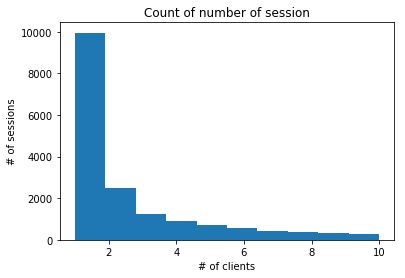

In [89]:
fig, ax = plt.subplots()
ax.hist(session_count, bins=10, range=(1,10))
plt.xlabel('# of clients')
plt.ylabel('# of sessions')
plt.title('Count of number of session');

In [ ]:
client_df.groupby('clientID').nunique()

## The average client get 5.5 sessions and sees 2.5 different therapists.
## People tend to get 1.25 hour sessions which is almost split between the 1h and 1.5h offerings we have.

In [90]:
client_df.groupby('clientID').nunique().mean()

TransactionDate     5.567647
clientID            1.000000
Therapist           2.577686
Address_Zip         0.920891
Invoice_Category    1.090646
Service_Category    1.075064
HrsWorked           1.242721
Year                1.514458
Month               2.887429
dtype: float64